# **Разработка собственного функционала для работы с REST API**

**Author:** Andrii Atoian

**Publication date:** 12/05/2024

**Email:** andrewatoyan@gmail.com


## **1. Описание принципов работы функционала**

Как было указанно в аннотации данного проекта, целью статьи является раскрытие принципа работы моего функционала, что базируется на взаимодействии с REST API. Следует отметить, что речь идёт только о сборе информации (GET запросы), тогда как другие способы взаимодействия в данном случае не учитываются.

Ниже приведена схема, описывающая этапы работы кода:


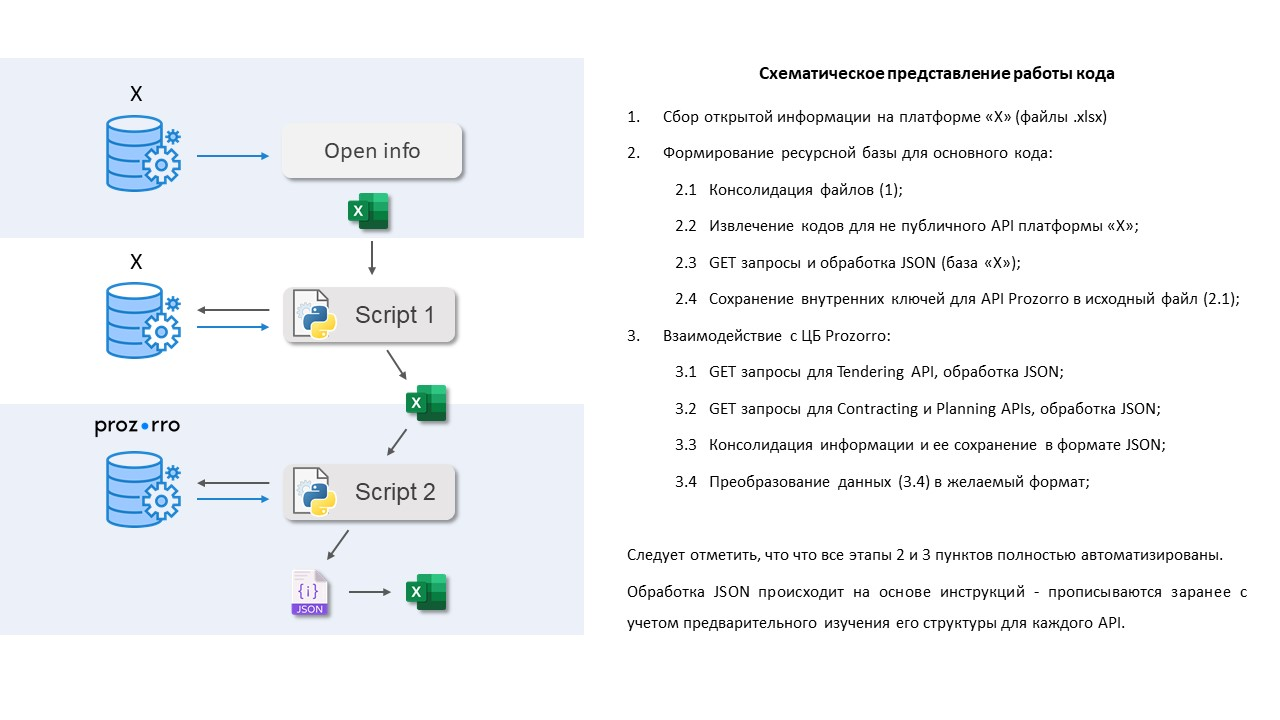

Трудность работы с **API Prozorro** заключается в сложности получения внутренних кодов процедур, по средством которых осуществляться запросы в ЦБ. Данные коды находятся на странице закупки, но консолидированной базы, где бы их можно было извлечь - не существует. Таким образом мы имеем открытый API, документацию по работе с ним (см. 1), но не сами коды, которые лежат в основе каждого запроса.

В ходе поиска решения данной проблемы были изучены различные способы получения данной информации:

*   написание ботов для сбора информации с веб страниц (web scraping);
*   изучения данных, предоставляемых рядом платформ (Qlik, SmartTender);

Но не один из них не позволял полноценно восполнить отсутствие данной информации.

Решение, которое мне удалось найти основывается на использовании скрытого (не публичного) API одного из ресурсов, что позволяет быстро и эффективно получить коды интересующих закупок. Средняя пропускная способность составляет 100 запросов в минуту. Именно это решение стало в основе написания первого блока кода, ответственного за сбор внутренних кодов закупок для API Prozorro (пункты 1 и 2 на схеме).

В целях предосторожности, название данного ресурса было изменено на «Х».

Таким образом, по завершению второго этапа мы получаем файл с перечнем процедур закупок и внутренних кодов к ним. Именно их мы используем в качестве ресурсной базы для основного кода (script 2).

В многом, принцип осуществления запросов и обработки JSON схож для всех 3-х видов API Prozorro. Единственное отличие – набор инструкций, что включает перечень элементов, их типы и структуру. Сами инструкции (дальше template) неразрывно связаны с самим функционалом.

Код не просто извлекает информацию, но и восполняет недостающие блоки, что делает его неуязвим в случае, когда структура JSON предполагает незначительные различия (к примеру: закупки с наличием и отсутствием лотов). Наличие вложенных элементов разной степени глубины также не является проблемой. С целью сохранения связи между элементами разной глубины, кодом предусмотрена **интеграция связующих полей** (реализована **концепция реляционных баз данных**).

Таким образом, предварительно изучив структуру JSON любого API и задав соответствующий template можно извлечь всю необходимую информацию.

Особенностью кода также являются его гибкость и скорость работы.



По объективным причинам, исходный код моего функционала отсутствует в данной статье. Но в подтверждение всего описанного выше, Вы можете ознакомиться с итоговыми файлами, что являются результатом его работы.

Это файлы в формате json и xlsx, описанные в секции 3 (см. 2).

Файлы содержат информацию на момент выгрузки и подлежат дальнейшее обработке. С целью экономии облачного пространства, для скачивания доступны данные за 2 месяца 2024 года (All2024_20240229135225). Хотя итоговая аналитика, как указанно в аннотации проекта будет включать все данные о закупках за период с 2021 - 2024 года.

Консолидированная версия файла с учетом всех этапов обработки и построения аналитики находится в том же репозитории (Закупівлі Групи Нафтогаз 2021 – 2024.xlsx).


# **2. Преимущество выгрузок над существующими аналогами и сферы их приминения**




1) Возможность получения полного среза о закупках: **"Планы – Процедуры - Договора"**.

Выгрузка сформирована по принципу реляционных баз данных, что позволяет связать воедино все составляющие.

**Сферы применения:** Анализ выполнения планов; эффективности расчёта приведенной стоимости; % завершенных договоров; создание дашбордов.

2) Наличие информации о закупаемой номенклатуре, включая: количество, ед. измерения, цены, классификацию УКТЗЕД, место поставки.

**Сферы применения:** Подготовка аналитики о динамике цен; расширение текущей таблицы для учета технических характеристик различной номенклатуры, формирования базы производителей.

Но **наиболее важным** является возможность **верификации информации** путем сопоставления текущей выгрузки и основной базы.

Это позволяет в значительной мере **повысить качество** и **полноту данных**. А интеграция технической колонки с внутренним кодом контракта в рамках основной базы, позволяет проводить периодические сверки поступаемой информации (в рамках организаиции) с опубликованной на Prozorro: контролировать суммы и статусы договоров, заключение доп. соглашений.





# **3. Аналитика динамики цен**

Как было упомянуто в предыдущей секции, одним из преимуществ представленных выгрузок является наличие **базы номенклатур**. Именно она играет ключевую роль в подготовки данной аналитики.

В сочетании с данными из других таблиц, а также информации сторонних ресурсов, можно значительно детализировать исходную таблицу. А случае отсутствия части данных (как цен за ед.), использовать ее как форму для набора информации, как это было сделано на примере горючего:

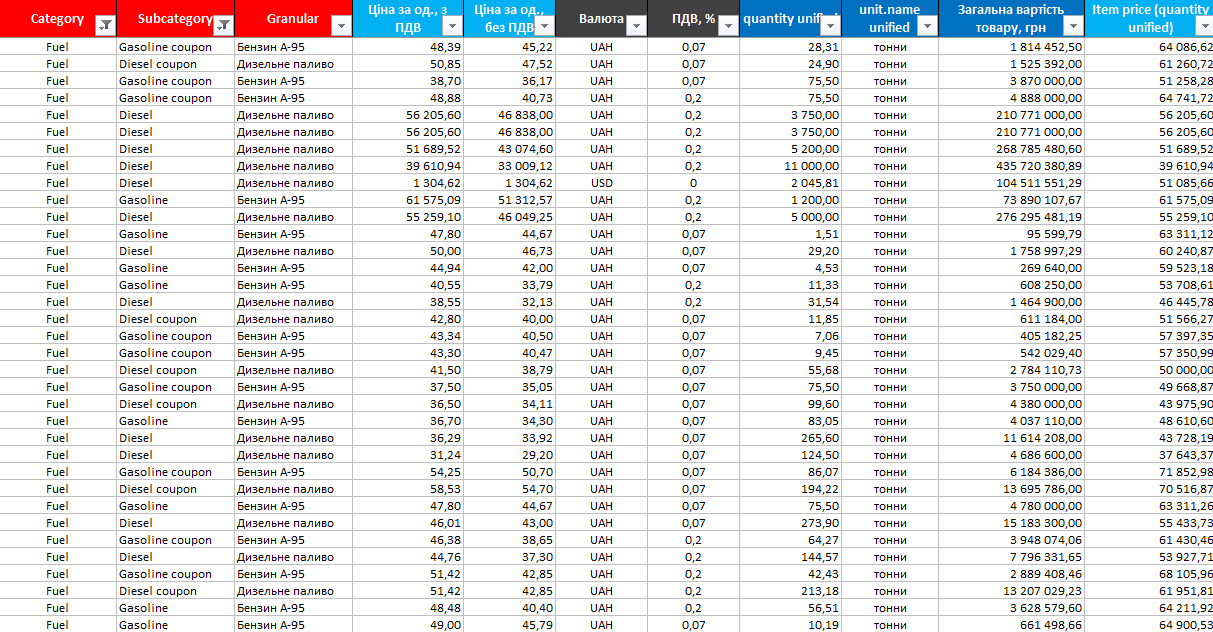

Итоговая таблица позволила проанализировать динамику средневзвешенных цен как на уровне отдельных компаний (УГВ, УТН, УТГ) так и Группы в целом.

Соответствующие результаты представлены ниже:


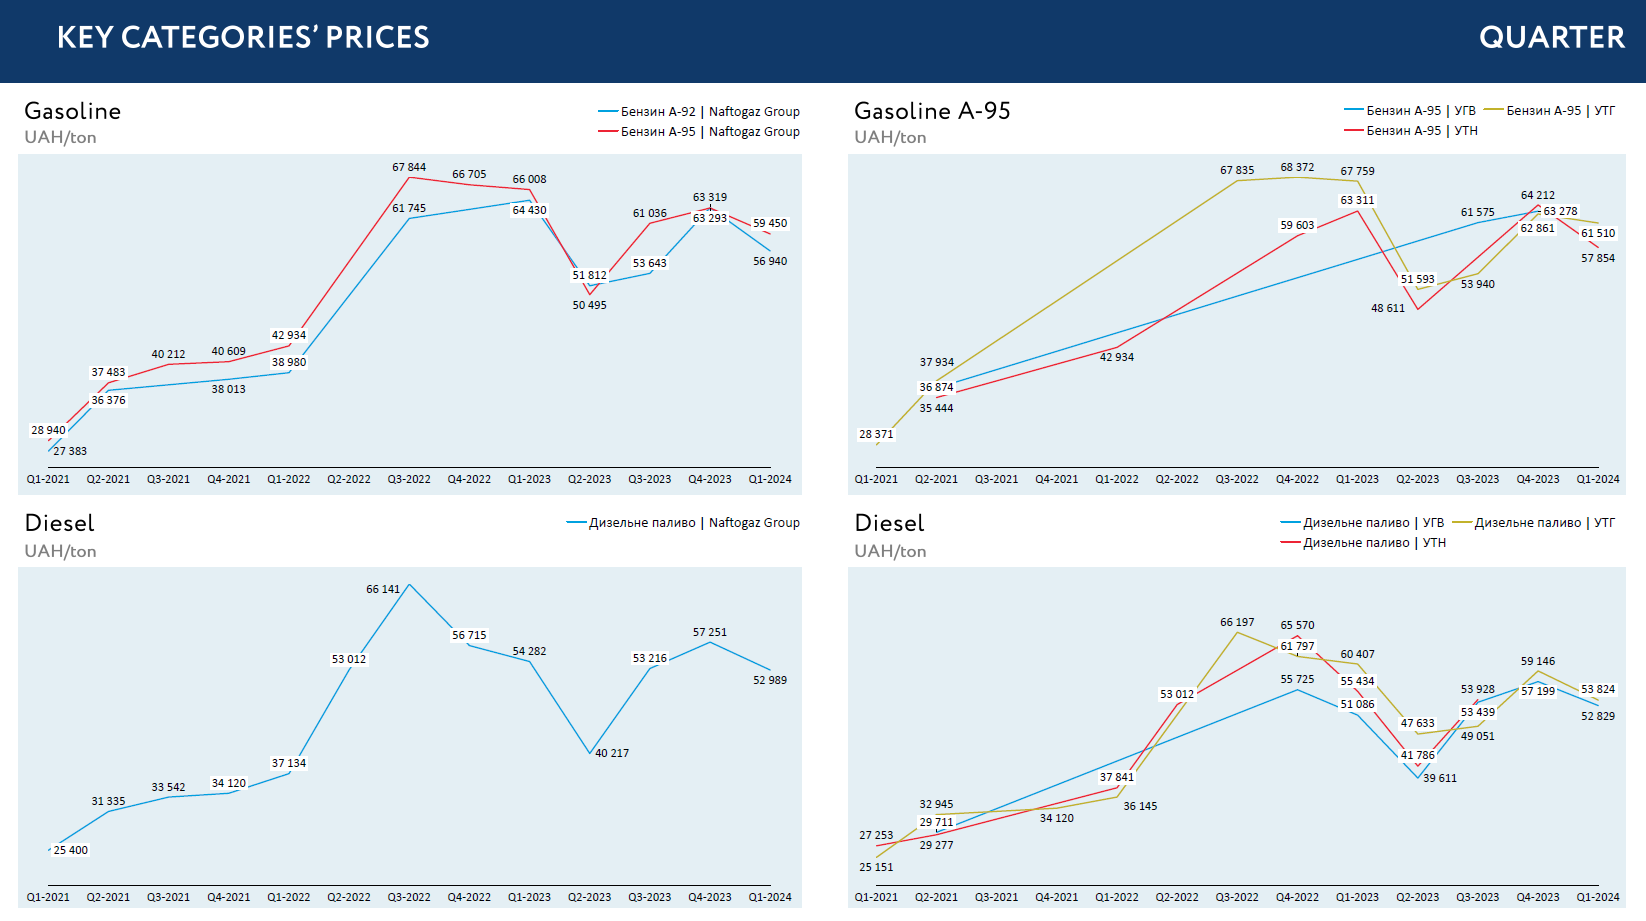

С полной версией презентации Вы можете ознакомиться на GitHub (PriceDynamics.pdf).

# Дополнительные материалы:

1.   Руководство по API Prozorro: https://prozorro-api-docs.readthedocs.io/en/master/

2. Данные выгрузки за 2 месяца 2024 года и Консолидировання база закупок: https://drive.google.com/drive/folders/1M9DhAuKRyYsM8mYpmHUvXUU9-eDvOSOQ?usp=sharing
